# Import train dataset

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from sklearn.metrics import accuracy_score

dataset = pd.read_csv('dota2Train.csv', header=None).as_matrix()

In [10]:
def filter_df(dataset):
    real_dataset = []
    for line in dataset:
        values = line[0:4].tolist()
        for i in range(4, len(line)):
            if line[i] == 1:
                values.append(i - 3)
            elif line[i] == -1:
                values.append((i - 3 )* -1)
        values = values[0:4] + sorted(values[4:])
        for i in range(4, 9):
            values[i] *= -1
        values = values[0:4] + sorted(values[4:9]) + values[9:]
        real_dataset.append(values)
    return pd.DataFrame(real_dataset)

In [11]:
real_dataset = filter_df(dataset)

# Correlation matrix

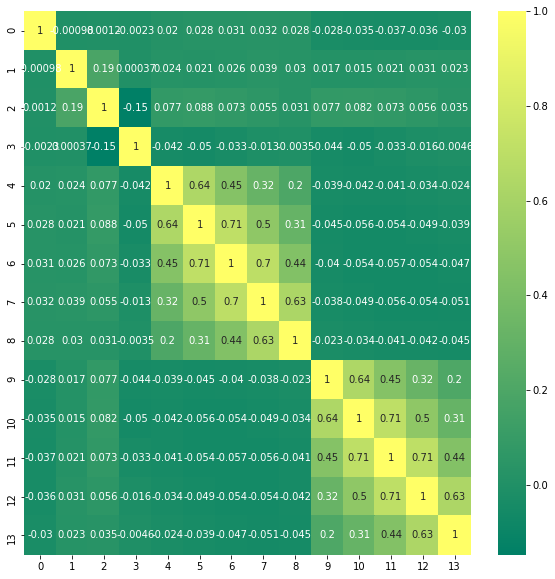

In [12]:
import seaborn as sns
mpl.rcParams['figure.figsize'] = (10, 10)
def table_corr(df):
    sns.heatmap(df.corr(), annot=True, cmap='summer')
    plt.show()
    
table_corr(real_dataset)

# Get target and data features

Checking the correlation matrix, we can see that columns 1,2,3 doesnt affect our model in a good way.

In [13]:
x = real_dataset.iloc[0:, 4:]
y = real_dataset.iloc[:, 0]

# Data plot

## TSNE

In [14]:
dados = real_dataset.iloc[:1000, 1:]

In [15]:
from sklearn.manifold import TSNE
mpl.rcParams['figure.figsize'] = (10, 10)
tsne = TSNE(n_components=2)
graf = tsne.fit_transform(dados)

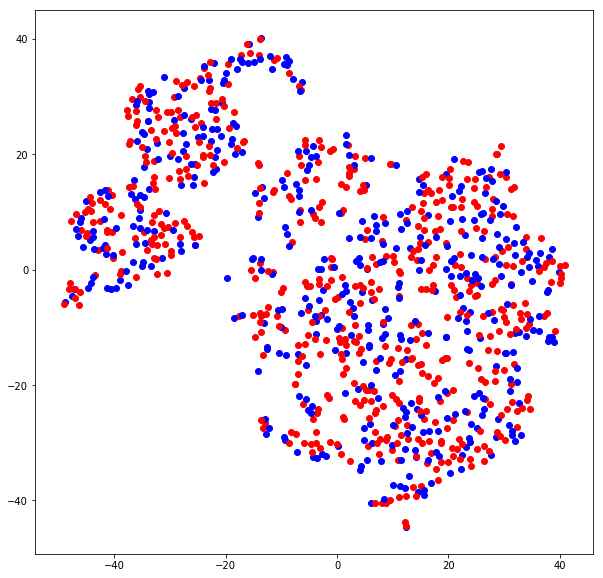

In [16]:
for xis in range(len(graf)):
    if real_dataset.iloc[:, 0][xis] == 1:
        plt.scatter(graf[xis][0], graf[xis][1], c='red')
    else:
        plt.scatter(graf[xis][0], graf[xis][1], c='blue')
plt.show()

## PCA

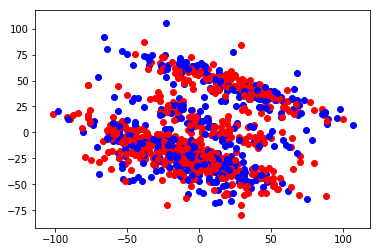

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(dados)
dados_pca = pca.fit_transform(dados)

for xis in range(len(dados_pca)):
    if real_dataset.iloc[:, 0][xis] == 1:
        plt.scatter(dados_pca[xis][0], dados_pca[xis][1], c='red')
    else:
        plt.scatter(dados_pca[xis][0], dados_pca[xis][1], c='blue')
plt.show()

# Import test dataset

In [17]:
test_df = pd.read_csv('dota2Test.csv', header=None).as_matrix()
dataset_test = filter_df(test_df)

X_testd = dataset_test.iloc[0:, 4:]
y_testd = dataset_test.iloc[:, 0]

# KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(x, y)

pred = knn.predict(X_testd)

In [19]:
acc_knn = accuracy_score(y_testd, pred)
print(acc_knn)

0.52943462211


# Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x, y)
pred_gnb = gnb.predict(X_testd)

In [21]:
acc_gnb = accuracy_score(y_testd, pred_gnb)
print(acc_gnb)

0.525840295318


# Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10)
dt.fit(x, y)
pred_dt = dt.predict(X_testd)

In [23]:
acc_dt = accuracy_score(y_testd, pred_dt)
print(acc_dt)

0.531086069555


# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(x, y)
pred_rfc = rfc.predict(X_testd)

In [25]:
acc_rfc = accuracy_score(y_testd, pred_rfc)
print(acc_rfc)

0.544200505149


# Multi layer perceptron

In [26]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(solver='lbfgs', alpha=1e-5)
mlpc.fit(x, y)

mlpc_pred = mlpc.predict(X_testd)

In [17]:
acc_mlpc = accuracy_score(y_testd, mlpc_pred)
print(acc_mlpc)

0.5320575092286769


# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(x, y)
lgp = lg.predict(X_testd)

In [19]:
acc_lg = accuracy_score(y_testd, lgp)
print(acc_lg)

0.5333203808043521


# Compare Results

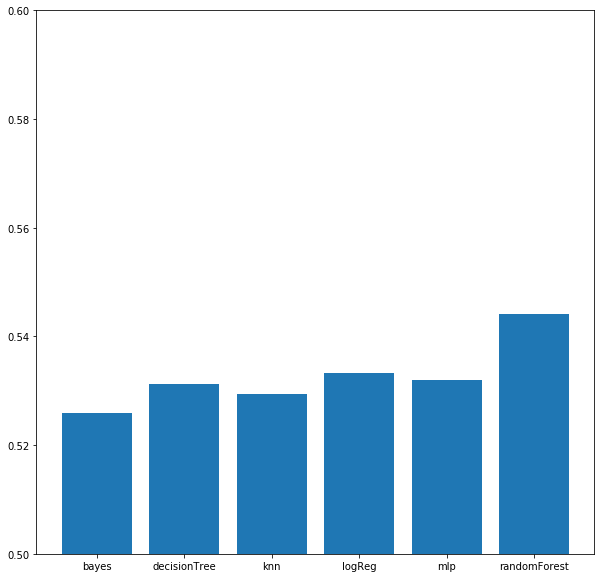

In [25]:
models = ['knn', 'bayes', 'decisionTree', 'randomForest', 'mlp', 'logReg']
scores = [acc_knn, acc_gnb, acc_dt, acc_rfc, acc_mlpc, acc_lg]

plt.bar(models, scores)
plt.ylim([0.5, 0.60])
plt.show()
